In [218]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [219]:
data=pd.read_csv('/content/drive/MyDrive/Training dataset/polynomial_train_1.csv')
A=data.iloc[:,0].values
B=data.iloc[:,1].values
C=data.iloc[:,2].values
Y=data.iloc[:,3].values
display(data)

,A,B,C,label
0,-1113.924581,952.105404,-276.045881,-1.294289e+03
1,-2229.480228,1111.488568,-93.454107,-2.714687e+04
2,2717.257713,53.431237,-179.228591,6.474300e+04
3,-1638.783965,-632.919447,-106.170237,-7.349871e+03
4,5173.934338,-721.895577,-75.074840,1.651328e+06
...,...,...,...,...
49995,-401.109554,205.180270,-123.837422,-6.275985e+00
49996,832.536891,-723.312711,-128.736597,2.390843e+02
49997,-533.446993,1171.457335,-130.840925,-2.857080e+02
49998,1810.499103,-424.111696,-128.334986,8.161595e+03


In [220]:
def coeff(n):
  s=0
  for i in range (n+1):
    for j in range(n+1-i):
      if (n-i-j>=0):
        s=s+A**i*B**j*C**(n-i-j)
  return s

In [221]:
n=int(input("enter the value of n: "))

enter the value of n: 5


In [222]:
val=np.zeros((50000,n))
for i in range(0,n):
  val[:,i]=coeff(i+1)
#now val is the training data set

#splitting the training data set
X=val[0:50000,:]
X_t=val[48000:50000,:]
y=Y[0:50000]
y_t=Y[48000:50000]

In [223]:
def cost(X, y, w, b):   
    p,q=np.shape(X_t)
    cost = 0.0
    for i in range(p):                                
        f_wb_i = np.dot(X[i], w) + b            
        cost = cost + (f_wb_i - y[i])**2       
    cost = cost / (2 * p)                          
    return cost

In [224]:
def gr(X,y,w,b):
  p,q=np.shape(X)
  dj_dw=np.zeros((q,))
  dj_db=0
  k=np.zeros(p)

  k=(np.matmul(X,w)-y)+b
  dj_db=np.sum(k)/p
  for j in range(n):
    dj_dw[j]=np.dot(X[:,j],k)
  dj_dw=dj_dw/p
  return dj_db,dj_dw

In [225]:
def zscore(X):
  mu=np.mean(X, axis=0)
  sigma=np.std(X,axis=0)
  X_1=(X-mu)/sigma
  return(X_1,mu,sigma)

X,mu,sigma=zscore(X)

In [226]:
def gradient_descent_cal(X,y,w,b,cost,gr,alpha,num):
  j_his=[]

  for i in range(num):
    dj_db,dj_dw = gr(X,y,w,b)
    w = w - alpha*dj_dw     
    b = b - alpha*dj_db  
    if i<=7001:
      j_his.append(cost(X,y,w,b))
      
    if (i%100) == 0:
      print("iteration: ",i)  
      print("cost :",j_his[i])
  return w,b,j_his  

iteration:  0
cost : 1297370691990.717
iteration:  100
cost : 24581848063.52503
iteration:  200
cost : 17947805040.630817
[-2.02495283e+05 -5.34480032e+02  4.49137969e+05 -6.85108530e+04
  2.26668464e+06]
4760.874137858231


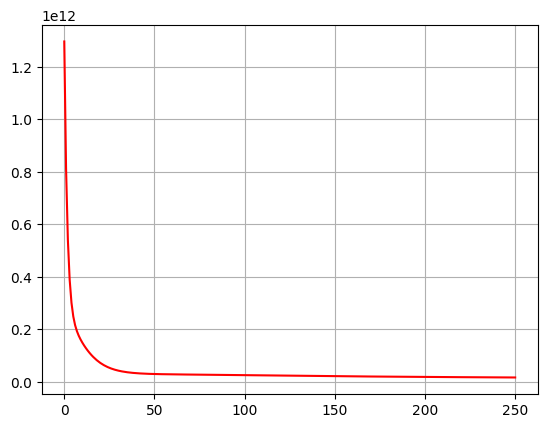

In [227]:
w_in=np.zeros(n)
b_in=0
num=251
alpha=0.1
j=[]
w,b,j=gradient_descent_cal(X,y,w_in,b_in,cost,gr,alpha,num)
print(w)
print(b) 
#cost vs iteration graph plot
plt.grid(True)
plt.plot(np.arange(num),j,c='red')
plt.show()

In [228]:
#accuracy
#feature scaling the test data set
X_t=(X_t-mu)/sigma

y1=(np.matmul(X_t,w))+b
mean=np.sum(y_t)/5000
e1=np.sum(np.square(y1-y_t))
e2=np.sum(np.square(y_t-mean))
acc=1-(e1/e2)
print("the r2 score for the following value of n: ",n," is ",acc)

the r2 score for the following value of n:  5  is  0.9950459155526137
